http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm

In [1]:
import pandas as pd

import numpy as np
import keras

from matplotlib import pyplot as plt

from keras.layers import Input, Dense
from keras.models import Model

%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv("data.csv")

In [3]:
df

,Country,Life Expectancy,People per Television,People per Physician,Female Life Expectancy,Male Life Expectancy
0,Argentina,70.5,4,370,74,67
1,Bangladesh,53.5,315,6166,53,54
2,Brazil,65.0,4,684,68,62
3,Canada,76.5,1.7,449,80,73
4,China,70.0,8,643,72,68
5,Colombia,71.0,5.6,1551,74,68
6,Egypt,60.5,15,616,61,60
7,Ethiopia,51.5,503,36660,53,50
8,France,78.0,2.6,403,82,74
9,Germany,76.0,2.6,346,79,73


In [4]:
df.columns,df.dtypes

(Index(['Country', 'Life Expectancy', 'People per Television',
        'People per Physician', 'Female Life Expectancy',
        'Male Life Expectancy'],
       dtype='object'), Country                    object
 Life Expectancy           float64
 People per Television      object
 People per Physician        int64
 Female Life Expectancy      int64
 Male Life Expectancy        int64
 dtype: object)

In [5]:
# df["People per Television"] = df["People per Television"].as_numeric
df["People per Television"] = pd.to_numeric(df["People per Television"],errors='coerce')

In [6]:
df = df.dropna()

In [7]:
df

,Country,Life Expectancy,People per Television,People per Physician,Female Life Expectancy,Male Life Expectancy
0,Argentina,70.5,4.0,370,74,67
1,Bangladesh,53.5,315.0,6166,53,54
2,Brazil,65.0,4.0,684,68,62
3,Canada,76.5,1.7,449,80,73
4,China,70.0,8.0,643,72,68
5,Colombia,71.0,5.6,1551,74,68
6,Egypt,60.5,15.0,616,61,60
7,Ethiopia,51.5,503.0,36660,53,50
8,France,78.0,2.6,403,82,74
9,Germany,76.0,2.6,346,79,73


In [8]:
# x = ppl/television
# y = ppl/doctor

x = df["People per Television"].values.reshape(-1,1)
y = df["People per Physician"].values.reshape(-1,1)

x.shape,y.shape

((38, 1), (38, 1))

Epoch 1/30
38/38 [==============================] - 0s - loss: inf              
Epoch 2/30
38/38 [==============================] - 0s - loss: nan     
Epoch 3/30
38/38 [==============================] - 0s - loss: nan     
Epoch 4/30
38/38 [==============================] - 0s - loss: nan     
Epoch 5/30
38/38 [==============================] - 0s - loss: nan     
Epoch 6/30
38/38 [==============================] - 0s - loss: nan     
Epoch 7/30
38/38 [==============================] - 0s - loss: nan     
Epoch 8/30
38/38 [==============================] - 0s - loss: nan     
Epoch 9/30
38/38 [==============================] - 0s - loss: nan     
Epoch 10/30
38/38 [==============================] - 0s - loss: nan     
Epoch 11/30
38/38 [==============================] - 0s - loss: nan     
Epoch 12/30
38/38 [==============================] - 0s - loss: nan     
Epoch 13/30
38/38 [==============================] - 0s - loss: nan     
Epoch 14/30
38/38 [==============================] 

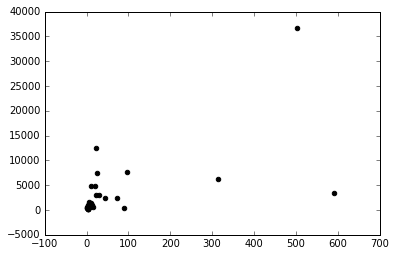

In [9]:
inputs = Input(shape=(1,))
preds = Dense(1,activation='linear')(inputs)

model = Model(inputs=inputs,outputs=preds)
sgd=keras.optimizers.SGD()
model.compile(optimizer=sgd ,loss='mse')
model.fit(x,y, batch_size=1, epochs= 30, verbose=1, shuffle=False)
plt.scatter(x,y,color='black')
plt.plot(x,model.predict(x), color='blue', linewidth=3)

Epoch 1/30
38/38 [==============================] - 0s - loss: 46015170.9785   
Epoch 2/30
38/38 [==============================] - 0s - loss: 40887788.6921     
Epoch 3/30
38/38 [==============================] - 0s - loss: 37079507.2211   
Epoch 4/30
38/38 [==============================] - 0s - loss: 34249470.9646     
Epoch 5/30
38/38 [==============================] - 0s - loss: 32145126.4011  
Epoch 6/30
38/38 [==============================] - 0s - loss: 30579285.3701     
Epoch 7/30
38/38 [==============================] - 0s - loss: 29413213.0916     
Epoch 8/30
38/38 [==============================] - 0s - loss: 28544040.9926     
Epoch 9/30
38/38 [==============================] - 0s - loss: 27895488.8013     
Epoch 10/30
38/38 [==============================] - 0s - loss: 27410970.0768     
Epoch 11/30
38/38 [==============================] - 0s - loss: 27048486.4220  
Epoch 12/30
38/38 [==============================] - 0s - loss: 26776885.8079     
Epoch 13/30
38/38 [====

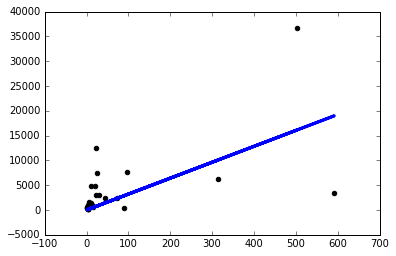

In [10]:
inputs = Input(shape=(1,))
preds = Dense(1,activation='linear')(inputs)

model = Model(inputs=inputs,outputs=preds)
sgd=keras.optimizers.SGD(lr=0.0000001)
model.compile(optimizer=sgd ,loss='mse')
model.fit(x,y, batch_size=1, epochs= 30, verbose=1, shuffle=False)
plt.scatter(x,y,color='black')
plt.plot(x,model.predict(x), color='blue', linewidth=3)

In [11]:
model.get_weights()

[array([[ 32.08229828]], dtype=float32), array([ 0.36274204], dtype=float32)]